<a href="https://colab.research.google.com/github/darstsharon/Aliens-Are-Real/blob/master/model_smallsample_20190704.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [0]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [0]:
%cd drive/My\ Drive/Datasets

[Errno 2] No such file or directory: 'drive/My Drive/Datasets'
/content/drive/My Drive/Datasets


In [0]:
!pwd


/content/drive/My Drive/Datasets


In [0]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'train'
valid_path = 'test'

In [0]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [0]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [0]:
# useful for getting number of output classes
folders = glob('train/*')

In [0]:
# our layers 
x = Flatten()(vgg.output)

In [0]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [0]:
# view the structure of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [0]:

# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [0]:
#!pwd

/content


In [0]:
#%cd drive/My\ Drive/Datasets

/content/drive/My Drive/Datasets


In [0]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1133 images belonging to 2 classes.


In [0]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 712 images belonging to 2 classes.


In [0]:
checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [0]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[checkpointer, early_stop]
)

Epoch 1/15
36/36 [==============================] - 659s 18s/step - loss: 0.4132 - acc: 0.8263 - val_loss: 0.2626 - val_acc: 0.8975

Epoch 00001: val_loss improved from inf to 0.26263, saving model to weights.hdf5
Epoch 2/15
36/36 [==============================] - 20s 554ms/step - loss: 0.1824 - acc: 0.9354 - val_loss: 0.2567 - val_acc: 0.9003

Epoch 00002: val_loss improved from 0.26263 to 0.25671, saving model to weights.hdf5
Epoch 3/15
36/36 [==============================] - 20s 563ms/step - loss: 0.1386 - acc: 0.9514 - val_loss: 0.2615 - val_acc: 0.9157

Epoch 00003: val_loss did not improve from 0.25671
Epoch 4/15
36/36 [==============================] - 20s 563ms/step - loss: 0.1084 - acc: 0.9627 - val_loss: 0.2869 - val_acc: 0.8764

Epoch 00004: val_loss did not improve from 0.25671


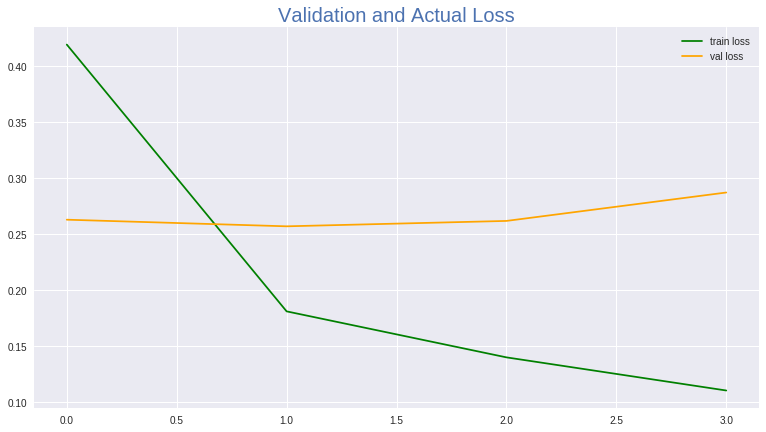

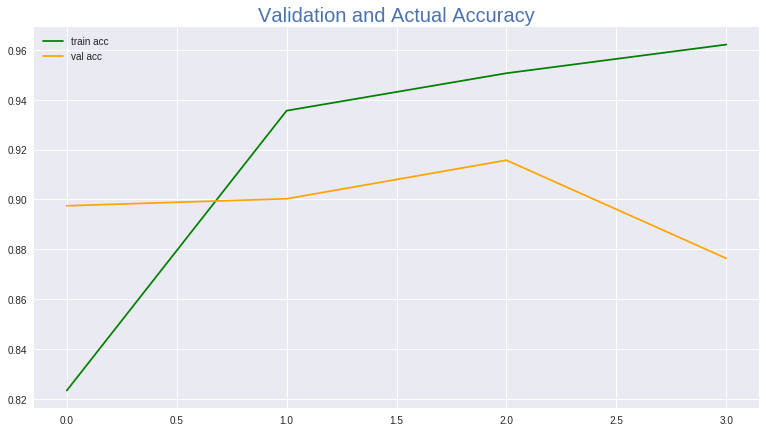

In [0]:
import matplotlib as mpl

def plotgraph(trainlossacc,labeltrain,vallossacc,labelval,title,filename):
    mpl.style.use('seaborn')
    plt.figure(figsize=(13,7))
    plt.plot(r.history[trainlossacc], label=labeltrain,color='green')
    plt.plot(r.history[vallossacc], label=labelval,color='orange')
    plt.title(title,fontsize=20,color='C6')
    plt.legend()
    plt.savefig(filename)
    plt.show()
    
plotgraph('loss','train loss','val_loss','val loss','Validation and Actual Loss','LossVal_loss.png')
plotgraph('acc','train acc','val_acc','val acc','Validation and Actual Accuracy','AccVal_acc.png')

In [0]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_smallsample_2019_07_04_vgg16.h5')

In [0]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

In [0]:
mymodel = load_model('model_smallsample_2019_07_04_vgg16.h5') 
img =image.load_img('valid/benign/8863_idx5_x1001_y1001_class0.png',target_size=(224,224)) 
input_img = image.img_to_array(img) 
input_img = np.expand_dims(input_img,axis=0) 
img_data = preprocess_input(input_img) 
classes = mymodel.predict(img_data).tolist()
getindex= np.argmax(classes)
if (getindex==0):
    result = "Benign"
else:
    result = "Malignant"
print(classes,result)

[[0.0, 1.0]] Malignant
